## Opdracht 2 - MNIST

De MNIST ("Modified National Institute of Standards and Technology")is een veelgebruikte dataset voor het testen en benchmarken van klassificatie algoritmes. Het bevat tienduizenden afbeeldingen van handgeschreven getallen. Meer info over deze dataset is te vinden op: http://yann.lecun.com/exdb/mnist/

Bij deze opdracht worden 3 databestanden meegeleverd:

    'train.csv' bevat gelabelde data voor trainen van de classifier.
    'test.csv' bevat gelabelde data voor het testen van de getrainde classifier
    'test_Kaggle.csv' bevat niet-gelabelde data voor het evalueren van de classifier via de competitie te vinden op https://www.kaggle.com/c/digit-recognizer. Deze data is dus enkel bruikbaar bij deelname aan de Kaggle competitie.

1) Train zowel een logistic regression classifier als een Support Vector Machine (met of zonder kernel. Ga via tuning van de hyperparameters op zoek naar de meest performante classifier. Doe dit door de accuracy te maximaliseren of de error rate te minimaliseren op de test.csv dataset. De error rate = 1- accuracy. Het trainen van Support Vector Machines (zeker deze met kernel) vragen enorm veel rekenkracht. Het is daarom verstandig om in eerste instantie te trainen op een klein deel van de training set. Het trainen via logistic regression is minder belastend voor de CPU, desalniettemin wordt aangeraden om de lbfgs solver te gebruiken. (LogisticRegression(multi_class='multinomial', solver='lbfgs'))

2) Verzorg de code telkens van commentaar en schrijf jouw conclusies en besluiten neer.

3) Is het nodig om hier te normaliseren? Welke normalisatie zou je gebruiken? Is de standardscaler een goede keuze?

4) Onderzoek de twee verschillende types van multiclass classification: one-vs-one (ovo) of one-vs-rest (ovr). Kijk vooral naar accuracy en berekeningstijd. Wat zijn de conclusies?

5) Test jouw uiteindelijke classifier met een aantal zelf geschreven getallen. Wat zijn de bevindingen? Waarvan hangt classificatienauwkeurigheid af?

6) Optioneel: test op de 'test_Kaggle' dataset en laad de resultaten in het juiste formaat op naar de Kaggle website. Wat is de behaalde score? Vergelijk deze score met de score op http://yann.lecun.com/exdb/mnist/

Het visualiseren van een digit kan met 'plt.imshow(X_train[n].reshape((28, 28)),cmap = 'gray')'

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Train set inlezen
digits = pd.read_csv('/content/drive/My Drive/datasets/train.csv')
test = pd.read_csv('/content/drive/My Drive/datasets/test.csv')

In [0]:
print(digits.head())
print(test.head())

   label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]
   label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      3       0       0       0  ...         0         0         0         0
1      8       0       0       0  ...         0         0         0         0
2      0       0       0       0  ...         0         0         0         0
3      0       0       0       0  ...         0         0         0         0
4      3       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]


In [0]:
print(digits.shape)
print(test.shape)

(30000, 785)
(12000, 785)


In [0]:
# splits train set in labels en features
y_train = digits['label']
X_train = digits.drop(['label'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=2000, test_size=1, random_state=123)

# splits test set in labels en features
y_test = test['label']
X_test = test.drop(['label'], axis=1)

In [66]:
print(X_train.shape)
print(y_train.shape)

(12000, 784)
(12000,)


In [0]:
# Scalen naar waarde tussen 0 en 1
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

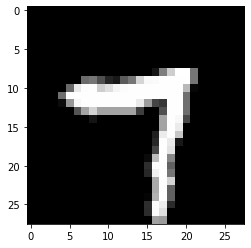

In [71]:
plt.imshow(X_train[0].reshape((28, 28)), cmap='gray')

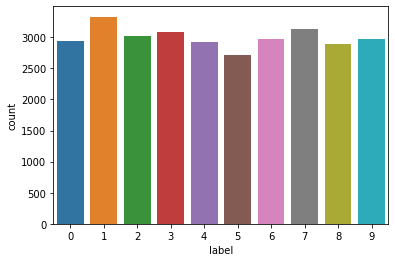

In [0]:
# Verdeling van het aantal voorbeeld getallen
sns.countplot(data=digits, x='label')

In [8]:
# Trainen van logistic regression model
# log_reg = LogisticRegression(C=100, multi_class='multinomial', solver='lbfgs', max_iter=1000, verbose=2, n_jobs=-1)
# log_reg = log_reg.fit(X_train, y_train)

# Beste resultaat zoeken met RandomizedSearch
from scipy.stats import uniform
paramters = { 
    'C': uniform(0.1, 20),
}
log_reg = RandomizedSearchCV(LogisticRegression(solver='lbfgs', multi_class='multinomial'), param_distributions=paramters, cv=5, n_jobs=-1, n_iter=20, scoring='f1_micro', verbose=2)
log_reg = log_reg.fit(X_train, y_train)

print('best score:', log_reg.best_score_)
print('best_params:', log_reg.best_params_)
best_model = log_reg.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   34.4s finished


best score: 0.8539999999999999
best_params: {'C': 0.6141648347814054}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
# Getrained model vergelijken met test set (test.csv)
y_pred = best_model.predict(X_test)
y_preds = best_model.predict_proba(X_test)

In [10]:
print('confussion matrix:')
print(metrics.confusion_matrix(y_test, y_pred))
print('classification report:')
print(metrics.classification_report(y_test, y_pred))
print('accuracy:', metrics.accuracy_score(y_test, y_pred))
print('F1-score:', metrics.f1_score(y_test, y_pred, average='micro'))

confussion matrix:
[[1120    0   15    9    1   17   14    3   14    2]
 [   0 1306    4    2    0   17    1    1   21    0]
 [   9   13  997   17   14   15   22   14   43   13]
 [   5   15   47 1086    2   38   10   12   26   17]
 [   1   15   12    1  986    1   24    7    9   84]
 [  15   14   13   77   22  828   27    9   49   22]
 [  25   11   19    3   16   11 1066    0   13    3]
 [   8   16   14    7   25    3    0 1119    4   72]
 [   7   52   26   45    5   39   11    2  958   29]
 [  10    9    9   19   55    9    2   62   11 1027]]
classification report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1195
           1       0.90      0.97      0.93      1352
           2       0.86      0.86      0.86      1157
           3       0.86      0.86      0.86      1258
           4       0.88      0.86      0.87      1140
           5       0.85      0.77      0.81      1076
           6       0.91      0.91      0.91     

In [11]:
# Beste resultaat zoeken met RandomizedSearch met One vs Rest
from scipy.stats import uniform
paramters = { 
    'C': uniform(0.1, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
log_reg_ovr = RandomizedSearchCV(LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=500), param_distributions=paramters, cv=5, n_jobs=-1, n_iter=20, scoring='f1_micro', verbose=2)
log_reg_ovr = log_reg_ovr.fit(X_train, y_train)

print('best score:', log_reg_ovr.best_score_)
print('best_params:', log_reg_ovr.best_params_)
best_model_ovr = log_reg_ovr.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 17.0min finished


best score: 0.8549999999999999
best_params: {'C': 0.22694702262088465, 'solver': 'saga'}


In [0]:
# Getrained model vergelijken met test set (test.csv)
y_pred = best_model_ovr.predict(X_test)
y_preds = best_model_ovr.predict_proba(X_test)

In [15]:
print('confussion matrix:')
print(metrics.confusion_matrix(y_test, y_pred))
print('classification report:')
print(metrics.classification_report(y_test, y_pred))
print('accuracy:', metrics.accuracy_score(y_test, y_pred))
print('F1-score:', metrics.f1_score(y_test, y_pred, average='micro'))

confussion matrix:
[[1135    0    9    6    2   12   17    1   12    1]
 [   0 1313    7    1    0   11    1    1   18    0]
 [   9   14 1001   16   14    9   25   16   41   12]
 [   4   18   63 1066    2   36   12   14   25   18]
 [   2   19   10    1  990    2   18    5   13   80]
 [  23   15    8   84   26  811   32    8   39   30]
 [  22   11   13    1   12   10 1088    0    9    1]
 [  10   21   12    5   17    5    2 1121    4   71]
 [  10   70   13   43    6   37    8    1  963   23]
 [  14   13    8   22   64   10    1   61   13 1007]]
classification report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1195
           1       0.88      0.97      0.92      1352
           2       0.88      0.87      0.87      1157
           3       0.86      0.85      0.85      1258
           4       0.87      0.87      0.87      1140
           5       0.86      0.75      0.80      1076
           6       0.90      0.93      0.92     

In [0]:
from sklearn.svm import SVC

In [37]:
# Support vector machine zonder kernel
svmc = SVC(kernel='linear', verbose=2, C=0.1)
svmc = svmc.fit(X_train, y_train)

[LibSVM]

In [0]:
y_pred = svmc.predict(X_test)

In [39]:
print('classification report: \n', metrics.classification_report(y_test, y_pred))
print('confussion matrics: \n', metrics.confusion_matrix(y_test, y_pred))
print('accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('f1-score: ', metrics.f1_score(y_test, y_pred, average='micro'))

classification report: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      1195
           1       0.89      0.98      0.94      1352
           2       0.89      0.89      0.89      1157
           3       0.87      0.86      0.86      1258
           4       0.88      0.89      0.89      1140
           5       0.86      0.80      0.83      1076
           6       0.93      0.93      0.93      1167
           7       0.92      0.91      0.92      1268
           8       0.88      0.83      0.86      1174
           9       0.87      0.87      0.87      1213

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

confussion matrics: 
 [[1147    1   10    6    1    9    9    1    8    3]
 [   0 1326    3    3    1    7    0    2   10    0]
 [  13   19 1025   14   18   14   20   11   19    4]
 [  10   18   38 1078    2   40    

In [56]:
# Support vector machine met default kernel
svmc_rbf = SVC(verbose=2, C=62, decision_function_shape='ovo')
svmc_rbf = svmc_rbf.fit(X_train, y_train)

[LibSVM]

In [0]:
y_pred = svmc_rbf.predict(X_test)

In [58]:
print('classification report: \n', metrics.classification_report(y_test, y_pred))
print('confussion matrics: \n', metrics.confusion_matrix(y_test, y_pred))
print('accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('f1-score: ', metrics.f1_score(y_test, y_pred, average='micro'))

classification report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1195
           1       0.95      0.99      0.97      1352
           2       0.81      0.92      0.86      1157
           3       0.90      0.87      0.88      1258
           4       0.92      0.92      0.92      1140
           5       0.93      0.86      0.89      1076
           6       0.94      0.92      0.93      1167
           7       0.95      0.91      0.93      1268
           8       0.91      0.90      0.90      1174
           9       0.90      0.89      0.89      1213

    accuracy                           0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.92      0.91      0.91     12000

confussion matrics: 
 [[1141    1   10    7    2    8   13    0   11    2]
 [   0 1332    4    4    4    1    1    0    4    2]
 [   9    7 1066    8   13    9   11   10   19    5]
 [   5   10   75 1090    2   20    

In [55]:
paramters = { 
    'C': uniform(0.1, 100),
    'kernel': ['linear', 'rbf', 'sigmoid']
}
svc_randomized = RandomizedSearchCV(SVC(verbose=2), param_distributions=paramters, cv=5, n_jobs=-1, n_iter=20, scoring='f1_micro', verbose=2)
svc_randomized = svc_randomized.fit(X_train, y_train)
print('best_score:', svc_randomized.best_score_)
print('best_classifier:', svc_randomized.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   44.6s finished


[LibSVM]best_score: 0.908
best_classifier: SVC(C=68.46680962324065, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=2)


In [0]:
y_pred = svc_randomized.predict(X_test)

In [54]:
print('classification report: \n', metrics.classification_report(y_test, y_pred))
print('confussion matrics: \n', metrics.confusion_matrix(y_test, y_pred))
print('accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('f1-score: ', metrics.f1_score(y_test, y_pred, average='micro'))

classification report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1195
           1       0.95      0.99      0.97      1352
           2       0.81      0.92      0.86      1157
           3       0.90      0.87      0.88      1258
           4       0.92      0.92      0.92      1140
           5       0.93      0.86      0.89      1076
           6       0.94      0.92      0.93      1167
           7       0.95      0.91      0.93      1268
           8       0.91      0.90      0.90      1174
           9       0.90      0.89      0.89      1213

    accuracy                           0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.92      0.91      0.91     12000

confussion matrics: 
 [[1141    1   10    7    2    8   13    0   11    2]
 [   0 1332    4    4    4    1    1    0    4    2]
 [   9    7 1066    8   13    9   11   10   19    5]
 [   5   10   75 1090    2   20    

In [72]:
paramters = { 
    'C': uniform(0.1, 100),
    'gamma': uniform(0.01, 1),
    'decision_function_shape': ['ovr', 'ovo']
}
svc_randomized = RandomizedSearchCV(SVC(verbose=2), param_distributions=paramters, cv=5, n_jobs=-1, n_iter=20, scoring='f1_micro', verbose=2)
svc_randomized = svc_randomized.fit(X_train, y_train)
print('best_score:', svc_randomized.best_score_)
print('best_classifier:', svc_randomized.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.4min finished


[LibSVM]best_score: 0.9425000000000001
best_classifier: SVC(C=90.41444279658784, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovo', degree=3,
    gamma=0.02712320475976792, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=2)


In [0]:
y_pred = svc_randomized.predict(X_test)

In [74]:
print('classification report: \n', metrics.classification_report(y_test, y_pred))
print('confussion matrics: \n', metrics.confusion_matrix(y_test, y_pred))
print('accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('f1-score: ', metrics.f1_score(y_test, y_pred, average='micro'))

classification report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1195
           1       0.97      0.99      0.98      1352
           2       0.87      0.94      0.91      1157
           3       0.93      0.92      0.93      1258
           4       0.95      0.95      0.95      1140
           5       0.94      0.93      0.93      1076
           6       0.96      0.96      0.96      1167
           7       0.96      0.93      0.95      1268
           8       0.93      0.92      0.93      1174
           9       0.94      0.92      0.93      1213

    accuracy                           0.94     12000
   macro avg       0.94      0.94      0.94     12000
weighted avg       0.94      0.94      0.94     12000

confussion matrics: 
 [[1156    0    8    2    0    7   12    0   10    0]
 [   0 1337    4    3    3    1    1    0    3    0]
 [   6    1 1089   10    9    3    6   12   18    3]
 [   1    8   36 1160    1   16    

### **Bevindingen**
#### **Normaliseren**
Normaliseren is opzich niet nodig aangezien we hier niet te maken hebben met een normaal verdeelde data. Het zijn gewoon pixelwaarden in RGB.  
Men kan wel gebruik maken van de MinMaxScaler om die RGB waarden om te schalen naar een getal tussen 0 en 1. Opzich zou dit geen verschil mogen maken voor het resultaat. 

#### **Logistic regression**
Aan de hand van `RandomizedSearch` een logistic regression model trainen duurt ongeveer 15 minuten op de volledige dataset. Dit geeft een **F1-score** van **0.86** idem voor de **accuracy**.   
De **recall** doet het in de meeste gevallen wel goed. Opvallend is dat de recall van **5** slechts **45%** is. Het model verward 5 vaak met 8. Ook de **precision** is over het algemeen vrij goed. Hierbij ook opvallend de precision van **8** is slechts **55%**. Hierbij zien we dat 8 vaak geclassificeerd wordt als een 5. 

##### **One vs Rest**  
Dit model duurt aanzienlijk langer om te trainen dan een **Multinomial** model. Dit komt doordat een **OvR** model voor elke klasse een classifier trained in vergelijking met elke andere klasse. Dit duurt aanzienlijk langer omdat er 10 verschillende classifiers getrained moeten worden. Op een kleinere dataset van 1000 training samples behaalt dit model een **F1-score** van **87%** exact hetzelfde als een **Multinomial** model.

#### **Support Vector Machine**
De **F1-score** van een linear One vs Rest SVC model ligt met een niet geoptimalizeerde C waarde al iets hoger dan het beste model van **Logistic Regression** -> 89%.  
Als we dan de **rbf** kernel gebruiken  met een geoptimalizeerde C-waarde zien we dat de **F1-score** nog hoger ligt op **91%**. Als we hier ook de **gamma** waarde optimaliseren behalen we een **F1-score** van **94** op een train set van 2000 samples.  
Opvallend is dat in tegenstelling tot het **Logistic Regression** model heeft **SVM** geen last van lage **recall** of **precision** bij een bepaald getal.

##### **OvO vs OvR**
Door de kleine train set is er niet echt een merkbaar verschil in tijd die nodig is een model met **OvO** of **OvR** te trainen. Als we `RandomizedSearch` toepassen zien we wel dat een model getrained met **OvO** het beste scoort. 